In [16]:
import joblib as jb
Feature_selection =jb.load('files/train/model/featureselected_model.pkl')
encode_model =jb.load('files/train/model/train_encode_model.pkl')
model=jb.load('files/train/model/lor.pkl')

import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [41]:
def flow (X_path,y_path):
    #read
    X_test=pd.read_csv(X_path)
    y_test=pd.read_csv(y_path)
    y_test=y_test.replace({'e':'edible','p':'Poision'})
    
    # encode
    encode_data=encode_model.transform(X_test)
    encode_data=pd.DataFrame(encode_data, columns=X_test.columns)
    
    # Feature_selection
    featuer_selected=encode_data[Feature_selection]

    # predcit
    y_pred=pd.DataFrame(model.predict(featuer_selected))  
    y_pred=y_pred.replace({1:'edible',0:'Poision'})
    
    #metrics
    report=classification_report(y_pred,y_test)
    cm=confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,disp

In [42]:
y_pred,report,disp=flow('test data/raw/test.csv','test data/y.csv')

In [43]:
y_pred

,0
0,edible
1,edible
2,edible
3,Poision
4,edible
...,...
2433,edible
2434,Poision
2435,edible
2436,Poision


In [44]:
print(report)

              precision    recall  f1-score   support

     Poision       0.91      0.94      0.92      1131
      edible       0.94      0.92      0.93      1307

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



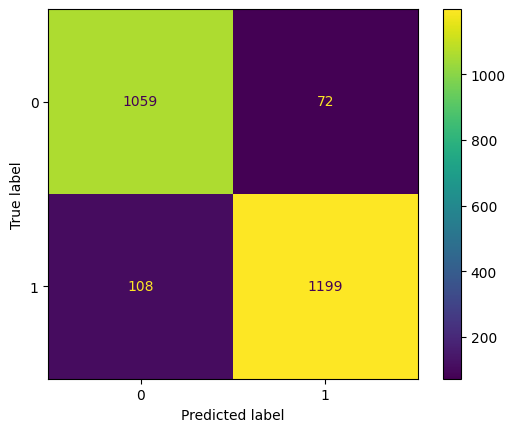

In [45]:
disp.plot()